<a href="https://colab.research.google.com/github/shivendra1-cyber/Root_Cause_analysis_UBER_Banglore/blob/main/RCA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries -

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving uber-data.csv to uber-data (1).csv


In [ ]:
# Loading the dataset -

df = pd.read_csv('uber-data.csv', parse_dates=[4,5], dayfirst=True, na_values="NA")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [ ]:
# Shape of the dataset -

print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 6745
No. of cols: 6


In [ ]:
# Checking the data type -

df.info(null_counts=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Request id         int64         
 1   Pickup point       object        
 2   Driver id          float64       
 3   Status             object        
 4   Request timestamp  datetime64[ns]
 5   Drop timestamp     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [ ]:
# Checking for null values -

df.isnull().sum() / len(df) * 100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [ ]:
# Checking for duplicate rows -

print("No. of duplicate rows: ", df.duplicated().sum())

No. of duplicate rows:  0


In [ ]:
df["RequestHour"] = df["Request timestamp"].dt.hour

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [ ]:
# Separate 5 different timeslots from the Hour - Dawn, Early Morning, Noon, Late Evening, Night -

df["TimeSlot"] = df["RequestHour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning"
                                                                        if x<=9 else ("Noon"
                                                                                      if x<=16 else ("Late Evening"
                                                                                                     if x<=21 else "Night"))))


In [ ]:
df.sample(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot
4941,2379,Airport,NaN,No Cars Available,2016-07-12 19:43:00,NaT,19,Late Evening
4731,1912,Airport,NaN,No Cars Available,2016-07-12 10:44:00,NaT,10,Noon
6287,5773,City,NaN,No Cars Available,2016-07-15 08:24:44,NaT,8,Early Morning
1710,5512,Airport,180.0,Trip Completed,2016-07-15 05:10:25,2016-07-15 05:42:24,5,Early Morning
2694,3867,City,284.0,Trip Completed,2016-07-13 21:45:14,2016-07-13 22:24:40,21,Late Evening
6489,6285,Airport,NaN,No Cars Available,2016-07-15 18:18:28,NaT,18,Late Evening
6023,5135,Airport,NaN,No Cars Available,2016-07-14 20:16:25,NaT,20,Late Evening
508,1958,Airport,52.0,Trip Completed,2016-07-12 11:41:00,2016-07-12 12:35:00,11,Noon
2813,4121,Airport,298.0,Trip Completed,2016-07-14 04:29:45,2016-07-14 05:07:30,4,Dawn
3972,1511,City,272.0,Cancelled,2016-07-12 05:40:00,NaT,5,Early Morning


In [ ]:
# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand -

df["Cab Availability"] = df["Status"].apply(lambda x: "Available" if x=="Trip Completed" else "Not Available")

In [ ]:
df['Cab Availability'].value_counts(normalize=True)*100

Not Available    58.028169
Available        41.971831
Name: Cab Availability, dtype: float64

Text(0.5, 1.0, 'Frequency of Requests by Hour')

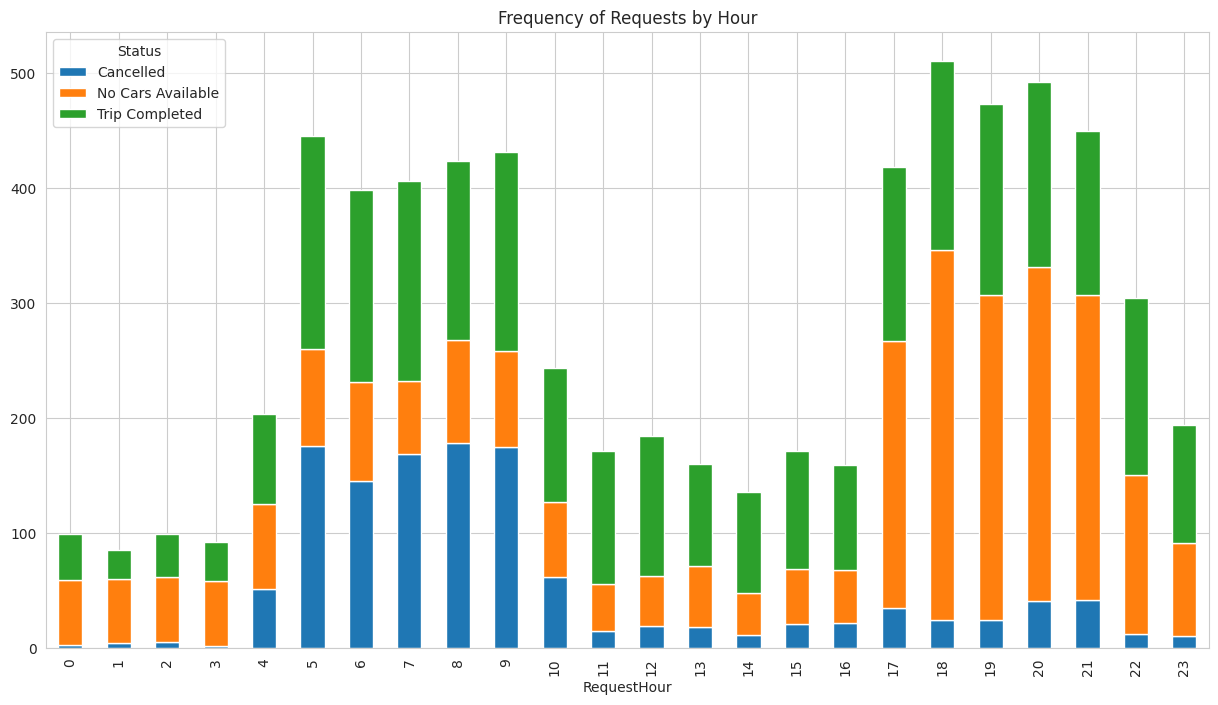

In [ ]:
# Frequency of Requests by Hour -

df.groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Frequency of Requests by Hour')

Text(0, 0.5, '')

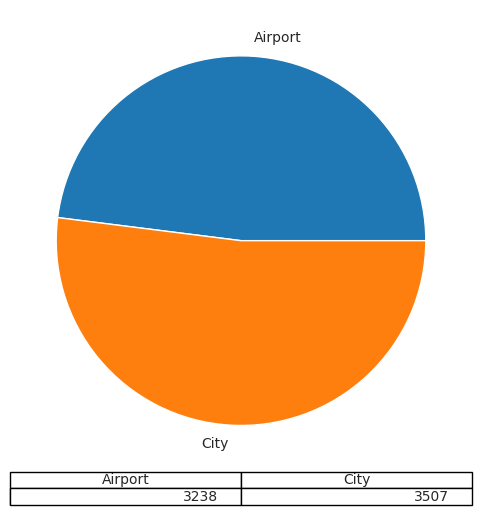

In [ ]:
# Types of Requests (city-airport or airport-city) -

df.groupby(['Pickup point']).size().plot(kind="pie", stacked=True, figsize=(6, 6), table=True)
plt.ylabel("")

Text(0, 0.5, '')

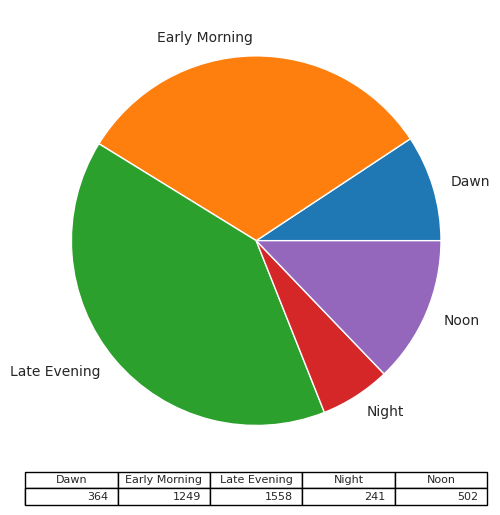

In [ ]:
# Distribution of Time Slots -

df[(df["Cab Availability"]=="Not Available")].groupby(['TimeSlot']).size().plot(kind="pie", stacked=True, figsize=(6, 6), table=True)
plt.ylabel("")

Text(0.5, 1.0, 'Demand-Supply Gap from Airport to City')

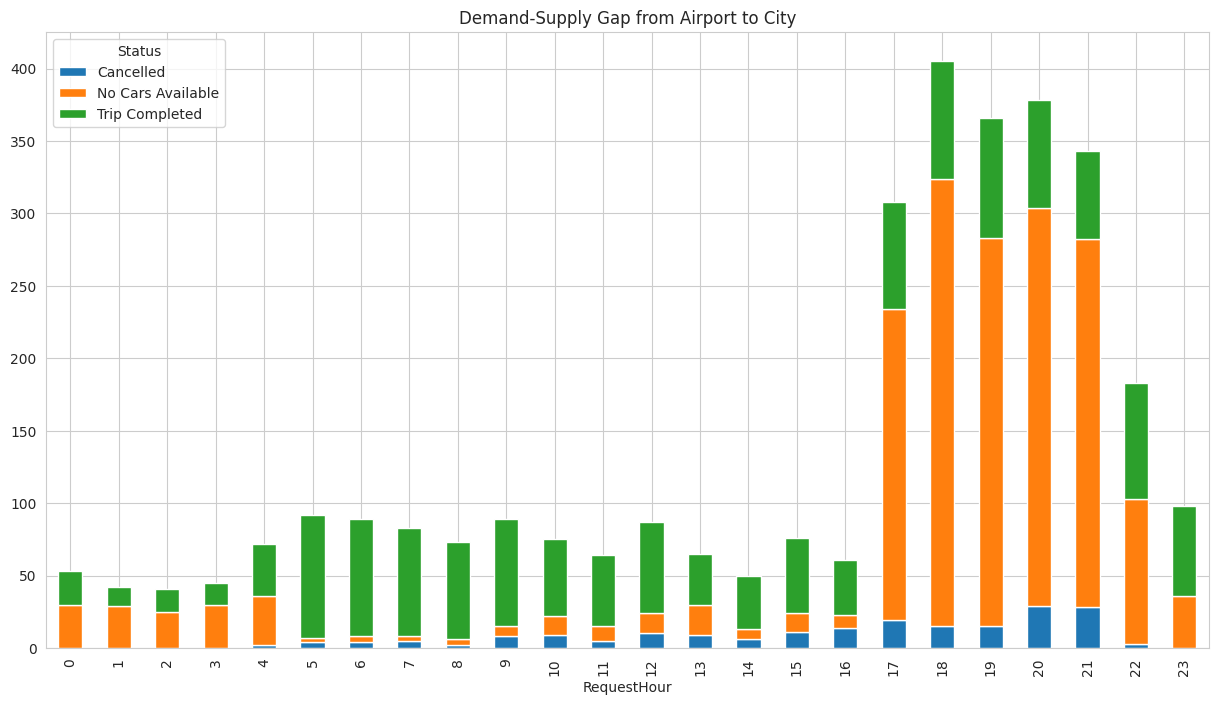

In [ ]:
# Demand-Supply Gap from Airport to City -

df[(df['Pickup point']=="Airport")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Demand-Supply Gap from Airport to City')

Text(0.5, 1.0, 'Demand-Supply Gap from City to Airport')

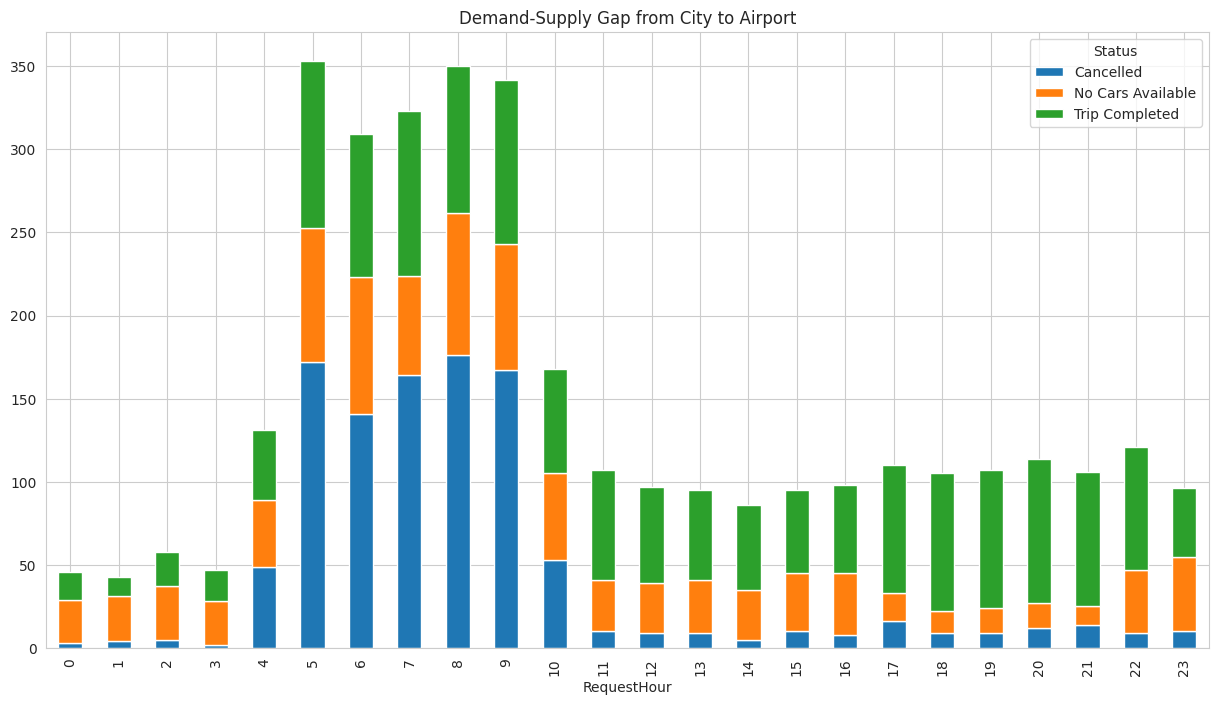

In [ ]:
# Demand-Supply Gap from City to Airport -

df[(df['Pickup point']=="City")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Demand-Supply Gap from City to Airport')

Text(0.5, 1.0, 'Time slots where highest gap exists')

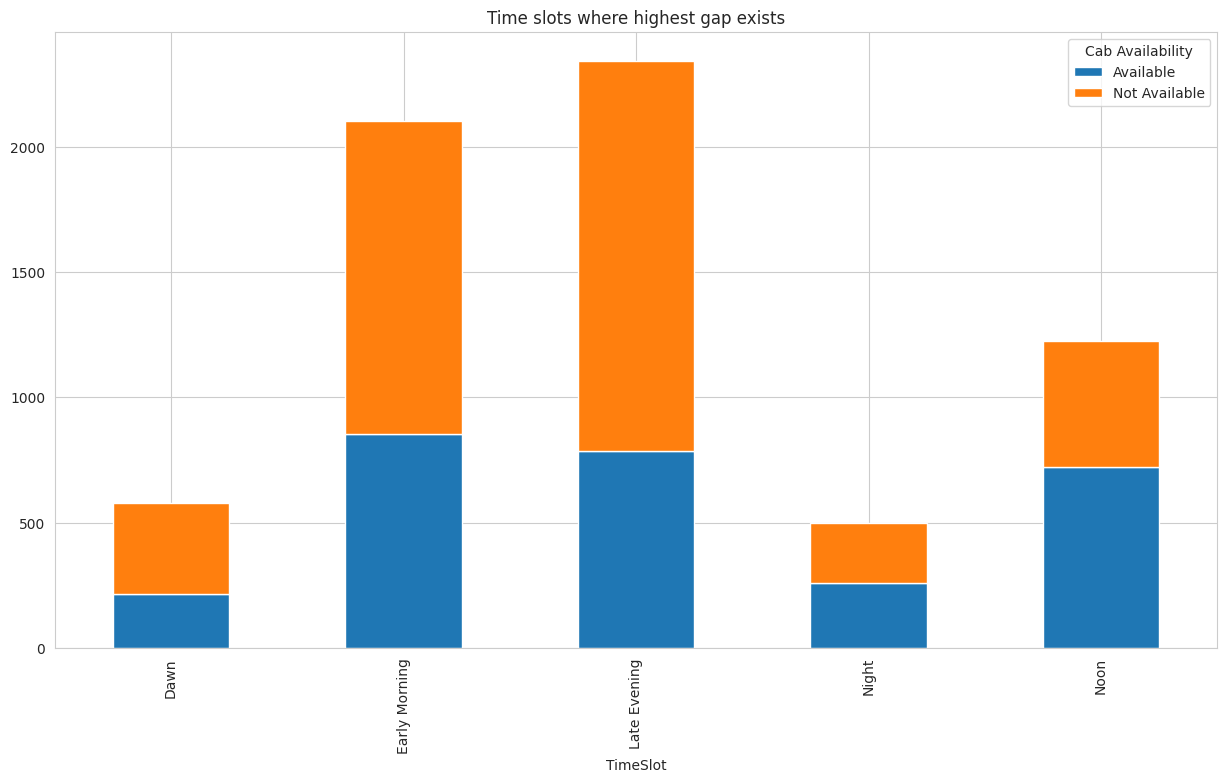

In [ ]:
# Time slots where highest gap exists -

df.groupby(['TimeSlot','Cab Availability']).size().unstack().plot(kind='bar', stacked=True,figsize=(15, 8))
plt.title('Time slots where highest gap exists')